### Model Predicts whether a student will pass based on study hours

***Plots the logistic curve***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

***Target(x)-Represents number of study hours***

***Target(y)-Represents whether student is passed(1) or failed(0)***

In [9]:
X=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])#Study hours
y=np.array([0,0,0,0,1,1,1,1,1,1])#0=Fail,Pass=1

# Split Data into Training and Testing sets

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Train Logistic Regression Model

In [20]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

# Make Predictions

In [23]:
y_pred=model.predict(X_test)
print('Predictions:',y_pred)

Predictions: [1 0]


# Evaluate the Model

In [26]:
accuracy=accuracy_score(y_test,y_pred)
print(f'accuracy:{accuracy:.2f}')

accuracy:1.00


# Visualize the logistic curve

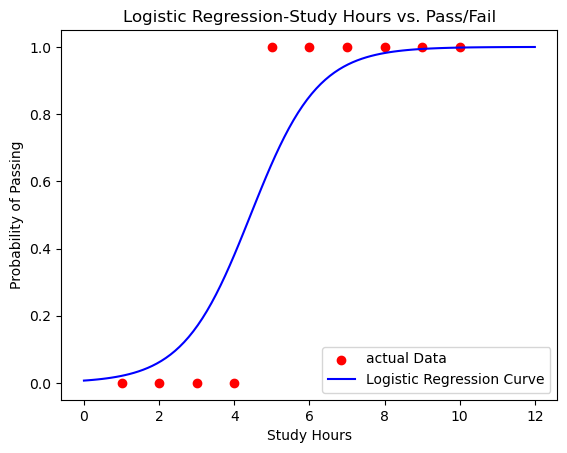

In [31]:
X_range=np.linspace(0,12,100).reshape(-1,1)
y_prob=model.predict_proba(X_range)[:,1]
plt.scatter(X,y,color='red',label='actual Data')
plt.plot(X_range,y_prob,color='blue',label='Logistic Regression Curve')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression-Study Hours vs. Pass/Fail')
plt.legend()
plt.show()

# We will use the heart disease dataset from kaggle to predict whether a patient has heart disease or not

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import StandardScaler

In [42]:
df=pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


# Exploratory Data Analysis(EDA)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  

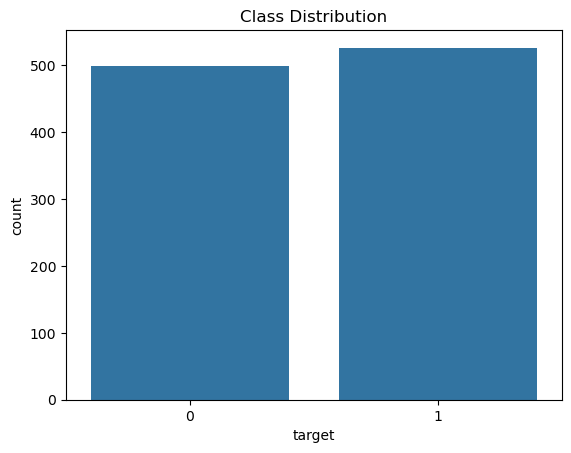

In [53]:
print(df.isnull().sum())
print(df.describe())
sns.countplot(x=df['target'])
plt.title('Class Distribution')
plt.show()

# Feature Selection and Preprocessing

In [50]:
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Train Logistic Regression Model

In [56]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Model Evaluation

Accuracy:0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



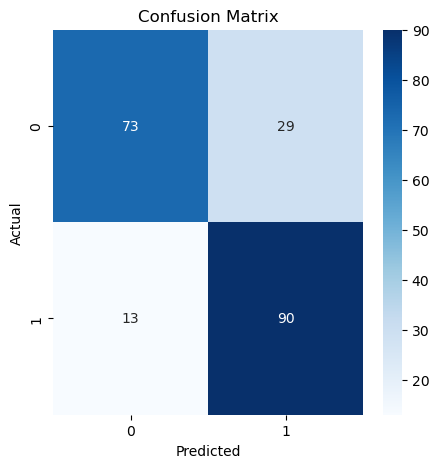

In [63]:
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy:.2f}')
print('\nClassification Report:\n',classification_report(y_test,y_pred))
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()